# Python para finanças e investimentos

---
## Importando bibliotecas

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import time
from pandas_datareader import data as wb 

---

---
## Recomendações do O PRIMO RICO para investir o capital

### 25% -- Ações
### 25% -- Fundos imobiliários
### 25% -- Investimentos internacionais
### 25% -- Caixa
---

---

## Tikers de ações

### Linhas áereas
- GOLL4.SA
- AZUL4.SA

### Petróleo
- PERT4.SA
- PETR3.SA

### Minérios
- VALE3.SA
- GGBR4.SA

### Frigoríficos
- JBSS3.SA
- MRFG3.SA
- BRFS3.SA
- BEEF3.SA

### Energia
- WEGE3.SA

### Bancos
- ITBU3.SA
- ITSA4.SA
- ITSA3.SA

### Odonto
- ODPV3.SA

### Vestuário
- GRND3.SA
- ALPA4.SA
- ALPA3.SA
- HGTX3.SA

### Serviços financeiros
- CIEL3.SA
- B3SA3.SA
- IRBR3.SA

### Hotéis
- HTMX11.SA
- HOOT3.SA

### Farma
- BIOM3.SA
- GBIO33.SA
- PNVL3.SA
- PNVL4.SA
- HYPE3.SA
- OFSA3.SA
- RADL3.SA

---

--- 
## Tiker de ações

In [2]:
inicio = time.time()
linhas_aereas = ['GOLL4.SA', 'AZUL4.SA']
petroleo = ['PETR4.SA', 'PETR3.SA']
minerios = ['VALE3.SA', 'GGBR4.SA']
frigorificos = ['JBSS3.SA', 'MRFG3.SA', 'BRFS3.SA', 'BEEF3.SA']
energia = ['WEGE3.SA']
bancos = ['ITUB3.SA', 'ITSA4.SA', 'ITSA3.SA']
odonto = ['ODPV3.SA']
vestuario = ['GRND3.SA', 'ALPA4.SA', 'ALPA3.SA', 'HGTX3.SA']
hoteis = ['HTMX11.SA']
servicos_financeiros = ['CIEL3.SA', 'B3SA3.SA', 'IRBR3.SA']
farma = ['BIOM3.SA', 'GBIO33.SA', 'PNVL3.SA', 'PNVL4.SA', 'HYPE3.SA', 'OFSA3.SA', 'RADL3.SA']

todas = ['GOLL4.SA', 'AZUL4.SA', 'PETR4.SA', 'PETR3.SA', 'VALE3.SA', 'GGBR4.SA', 'JBSS3.SA', 'MRFG3.SA', 'BRFS3.SA', 'BEEF3.SA', 'WEGE3.SA', 'ITUB3.SA', 'ITSA4.SA', 'ITSA3.SA', 'ODPV3.SA', 'GRND3.SA', 'ALPA4.SA', 'ALPA3.SA', 'HGTX3.SA', 'HTMX11.SA', 'CIEL3.SA', 'B3SA3.SA', 'IRBR3.SA', 'BIOM3.SA', 'GBIO33.SA', 'PNVL3.SA', 'PNVL4.SA', 'HYPE3.SA', 'OFSA3.SA', 'RADL3.SA']

acoes = ['GOLL4.SA', 'PETR4.SA', 'GGBR4.SA', 'JBSS3.SA', 'WEGE3.SA']

---

---
## Funções para cálculos de finanças

In [3]:
def get_dataframe(tikers):
    data_frame = pd.DataFrame()
    for t in tikers:
        data_frame[t] = wb.DataReader(t, data_source='yahoo', start='2020-1-1')['Adj Close']
    return data_frame

def plot_graph(data_frame, size):
    data_frame.plot(figsize=size)
    plt.show()

def normalize(data_frame):
    return (data_frame / data_frame.iloc[0] * 100)

def simple_return(data_frame):
    return (data_frame / data_frame.shift(1)) - 1

def log_return(data_frame):
    return np.log(data_frame / data_frame.shift(1))

def s_day_return(tikers):
    return simple_return(get_dataframe(tikers)).mean()

def s_anual_return(tikers):
    return s_day_return(tikers) * 250

def s_percentual_return(tikers):
    return s_anual_return(tikers) * 100

def l_day_return(tikers):
    return log_return(get_dataframe(tikers)).mean()

def l_anual_return(tikers):
    return l_day_return(tikers) * 250

def l_percentual_return(tikers):
    return l_anual_return(tikers) * 100

def vol_return(log_return):
    quant_pesos = log_return.shape[1]
    retorno_portifolio = []
    retorno_volatividade = []
    pesos = []
    
    for i in range(100):

        weigth = []
        for i in range(quant_pesos):
            weigth.append(np.random.random())
        weigth = np.array(weigth)
        weigth /= sum(weigth)

        retorno_portifolio.append(np.sum(weigth * log_return.mean()) * 250)
        retorno_volatividade.append(np.sqrt(np.dot(weigth.T, np.dot(log_return.cov() * 250, weigth))))
        pesos.append(weigth)

    retorno_portifolio = np.array(retorno_portifolio)
    retorno_volatividade = np.array(retorno_volatividade)

    portfolios = pd.DataFrame({'Return': retorno_portifolio, 'Volatility': retorno_volatividade})
    
    pesos = pd.DataFrame(pesos)

    for p in range(pesos.shape[1]):
        portfolios[p] = pesos[p]

    return portfolios

def plot_volatility(dados):
    dados.plot(figsize=(15,9), y = 'Return', x = 'Volatility', kind = 'scatter', marker = '*', s = 100, color='b')
    plt.xlabel = 'Volatility'
    plt.ylabel = 'Return'
    plt.show()

---

---
## Análise das ações das empresas de linhas aéreas

#### A tabela abaixo representa o valor de fechamento das ações de 2018 até 2020/03/10

In [4]:
get_dataframe(linhas_aereas)

GOLL4.SA   AZUL4.SA
Date                            
2018-01-02  15.190000  27.150000
2018-01-03  15.010000  27.059999
2018-01-04  15.580000  27.230000
2018-01-05  15.660000  27.200001
2018-01-08  15.700000  26.910000
...               ...        ...
2020-03-06  21.049999  38.680000
2020-03-09  17.379999  32.099998
2020-03-10  18.320000  36.180000
2020-03-11  15.650000  30.250000
2020-03-12   9.970000  20.299999

[540 rows x 2 columns]

#### O gráfico abaixo representa o valor das ações

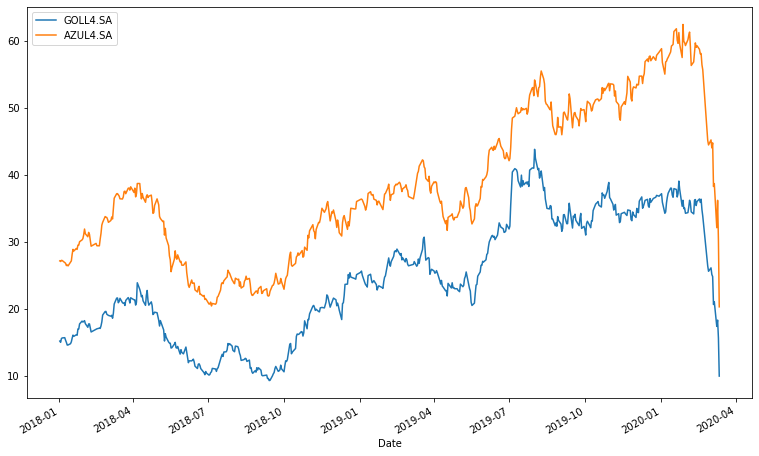

In [5]:
plot_graph(get_dataframe(linhas_aereas), (13,8))

In [6]:
dados_normalizados = normalize(get_dataframe(linhas_aereas))

#### O grágico abaixo representa o percentual de valorização das ações

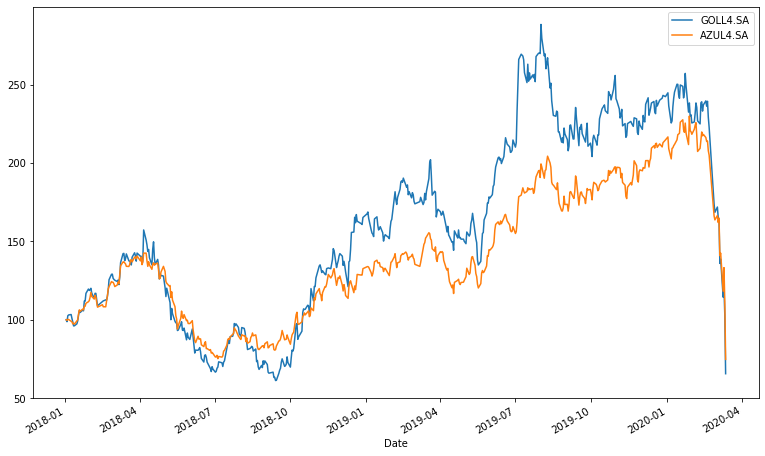

In [7]:
plot_graph(dados_normalizados, (13,8))

In [8]:
retorno_simples = simple_return(get_dataframe(linhas_aereas))

#### O gráfico abaixo representa a variação das ações em relação a média

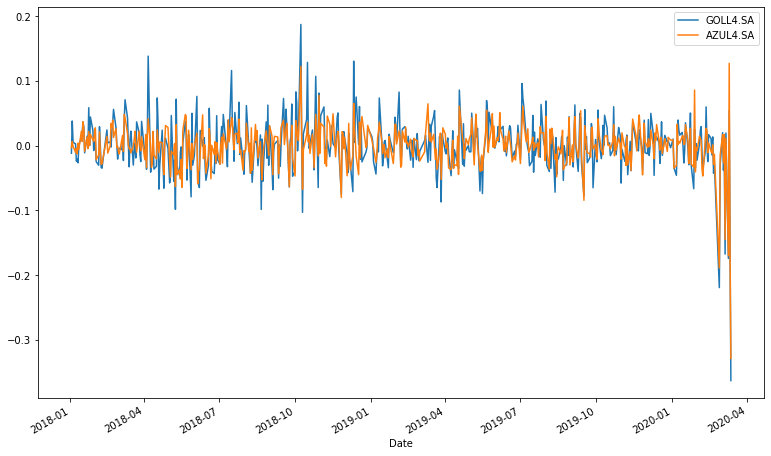

In [9]:
plot_graph(retorno_simples, (13,8))

#### A tabela abaixo representa a valorização das ações em % em aproximadamente 1 ano

In [10]:
s_percentual_return(linhas_aereas)

GOLL4.SA    3.668672
AZUL4.SA    1.024326
dtype: float64

In [11]:
retorno_logaritmo = log_return(get_dataframe(linhas_aereas))

#### A tabela abaixo representa os resultados com o maior retorno e menor volatividade em ordem cresente

In [12]:
retorno_volatividade = vol_return(log_return(get_dataframe(linhas_aereas)))
retorno_volatividade.sort_values(['Return', 'Volatility'], ascending=[True, False], inplace=True)
retorno_volatividade

Return  Volatility         0         1
69 -0.195223    0.692732  0.998805  0.001195
74 -0.193543    0.686290  0.971004  0.028996
14 -0.191413    0.678278  0.935770  0.064230
70 -0.190826    0.676097  0.926043  0.073957
71 -0.187738    0.664865  0.874948  0.125052
..       ...         ...       ...       ...
0  -0.139631    0.553396  0.078965  0.921035
90 -0.139407    0.553217  0.075252  0.924748
58 -0.137964    0.552152  0.051373  0.948627
75 -0.135819    0.550845  0.015877  0.984123
20 -0.135489    0.550673  0.010422  0.989578

[100 rows x 4 columns]

#### O gráfico abaixo representa área de retorno e volatividade de acordo com a teoria de Markowitz

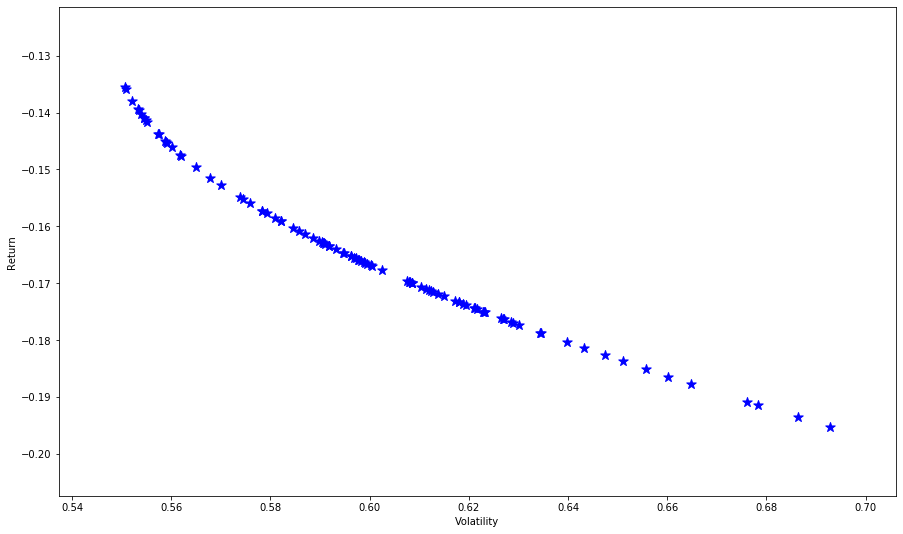

In [13]:
plot_volatility(retorno_volatividade)

---

---
## Análise de ações de empresas de petróleo

#### A tabela abaixo representa o valor de fechamento das ações de 2018 até 2020/03/10

In [14]:
get_dataframe(petroleo)

PETR4.SA   PETR3.SA
Date                            
2018-01-02  15.354614  16.876842
2018-01-03  15.493781  17.091085
2018-01-04  15.521611  17.237167
2018-01-05  15.614388  17.373505
2018-01-08  15.799945  17.646183
...               ...        ...
2020-03-06  22.830000  24.059999
2020-03-09  16.049999  16.920000
2020-03-10  17.559999  18.360001
2020-03-11  15.700000  16.370001
2020-03-12  12.600000  12.920000

[540 rows x 2 columns]

#### O gráfico abaixo representa o valor das ações

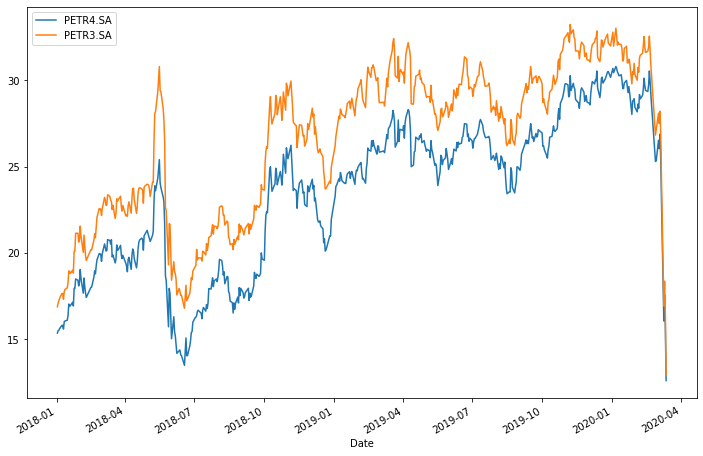

In [15]:
plot_graph(get_dataframe(petroleo), (12,8))

#### O grágico abaixo representa o percentual de valorização das ações

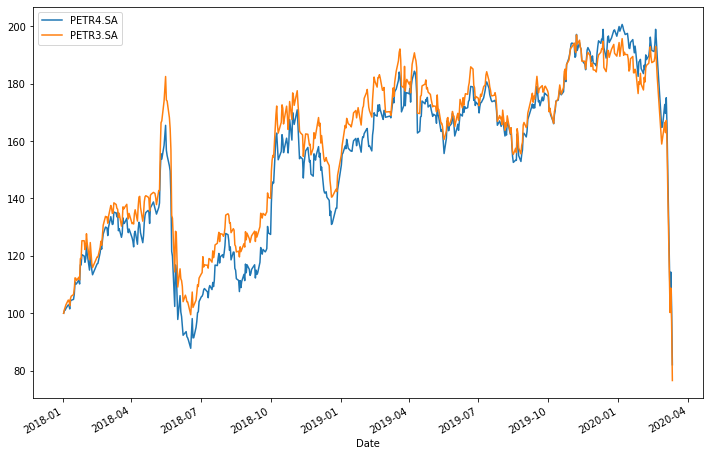

In [16]:
plot_graph(normalize(get_dataframe(petroleo)), (12,8))

In [17]:
retorno_simples = simple_return(get_dataframe(petroleo))

#### O gráfico abaixo representa a variação das ações em relação a média

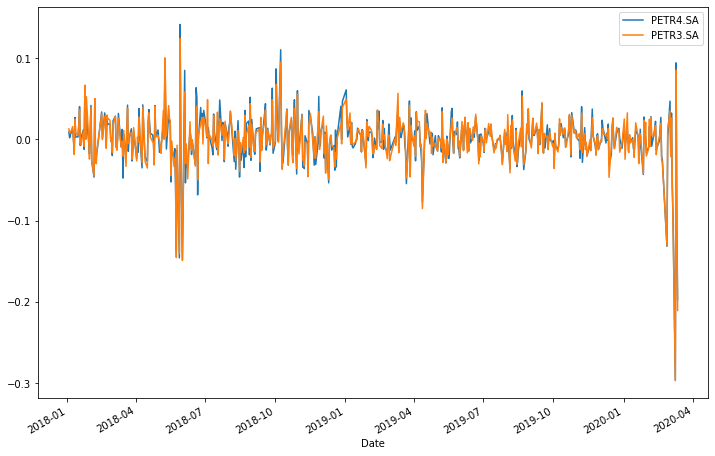

In [18]:
plot_graph(retorno_simples, (12,8))

#### A tabela abaixo representa a valorização das ações em % em aproximadamente 1 ano

In [19]:
s_percentual_return(petroleo)

PETR4.SA    4.170340
PETR3.SA    0.358795
dtype: float64

#### A tabela abaixo representa os resultados com o maior retorno e menor volatividade em ordem cresente

In [20]:
retorno_logaritmo = log_return(get_dataframe(petroleo))
retorno_volatividade = vol_return(retorno_logaritmo)
retorno_volatividade.sort_values(['Return', 'Volatility'], ascending=[True, False], inplace=True)
retorno_volatividade

Return  Volatility         0         1
53 -0.123884    0.515159  0.001048  0.998952
93 -0.122920    0.514987  0.030979  0.969021
30 -0.122429    0.514912  0.046221  0.953779
73 -0.122409    0.514909  0.046843  0.953157
17 -0.122017    0.514854  0.059005  0.940995
..       ...         ...       ...       ...
83 -0.095330    0.522993  0.887491  0.112509
57 -0.095073    0.523183  0.895496  0.104504
0  -0.092636    0.525088  0.971143  0.028857
80 -0.092520    0.525183  0.974730  0.025270
67 -0.092467    0.525228  0.976396  0.023604

[100 rows x 4 columns]

#### O gráfico abaixo representa área de retorno e volatividade de acordo com a teoria de Markowitz

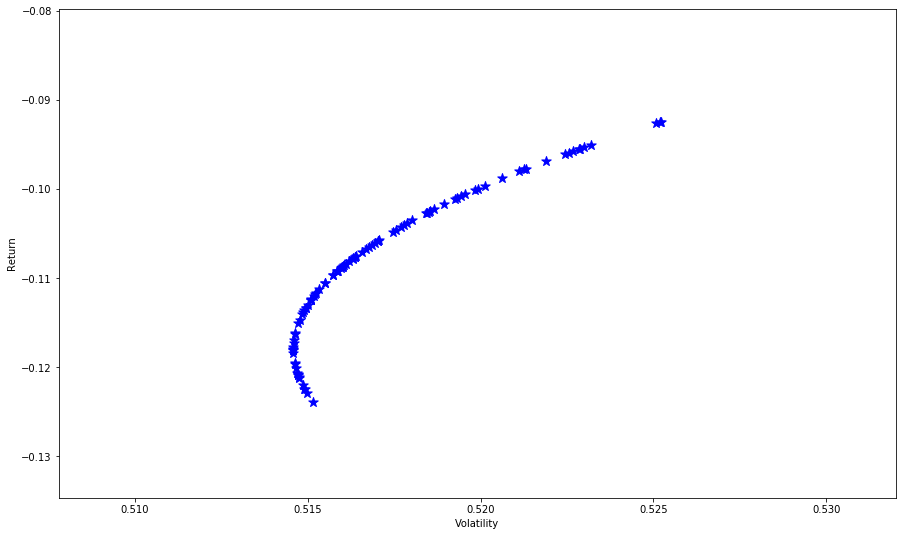

In [21]:
plot_volatility(retorno_volatividade)

---

---
## Análise de empresas de minério

#### O gráfico abaixo representa o valor das ações

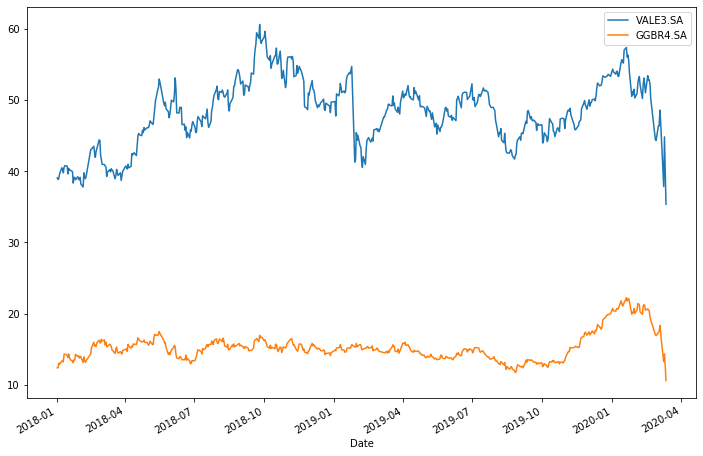

In [22]:
plot_graph(get_dataframe(minerios), (12,8))

#### O grágico abaixo representa o percentual de valorização das ações

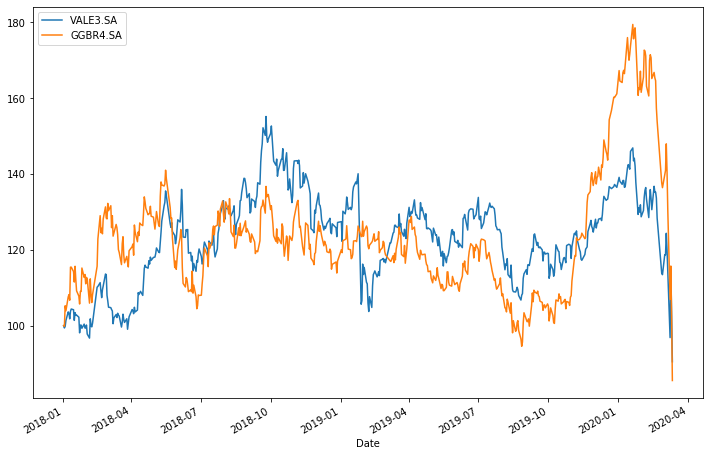

In [23]:
plot_graph(normalize(get_dataframe(minerios)), (12,8))

#### O gráfico abaixo representa a variação das ações em relação a média

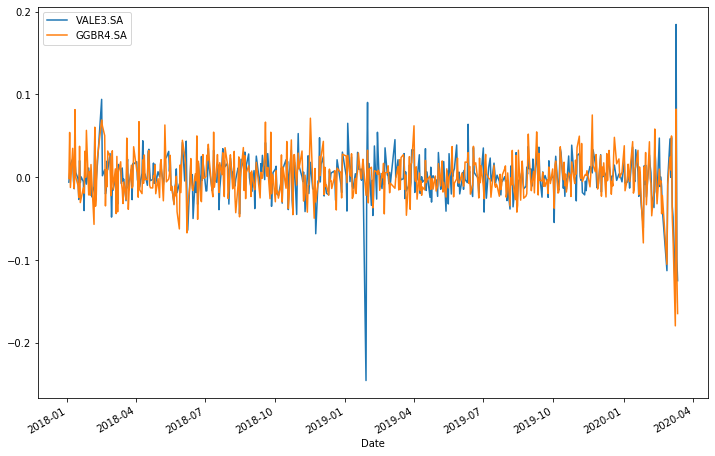

In [24]:
retorno_simples = simple_return(get_dataframe(minerios))
plot_graph(retorno_simples, (12,8))

#### A tabela abaixo representa a valorização das ações em % em aproximadamente 1 ano

In [25]:
s_percentual_return(minerios)

VALE3.SA    4.595354
GGBR4.SA    2.132070
dtype: float64

#### A tabela abaixo representa os resultados com o maior retorno e menor volatividade em ordem cresente

In [26]:
retorno_logaritmo = log_return(get_dataframe(minerios))
retorno_volatividade = vol_return(retorno_logaritmo)
retorno_volatividade.sort_values(['Return', 'Volatility'], ascending=[True, False], inplace=True)
retorno_volatividade

Return  Volatility         0         1
44 -0.072245    0.434599  0.008101  0.991899
4  -0.072064    0.433529  0.015041  0.984959
88 -0.071451    0.430009  0.038472  0.961528
51 -0.070939    0.427178  0.058060  0.941940
43 -0.070235    0.423460  0.084951  0.915049
..       ...         ...       ...       ...
9  -0.049007    0.419639  0.896405  0.103595
60 -0.048345    0.422925  0.921706  0.078294
77 -0.048301    0.423151  0.923394  0.076606
70 -0.047821    0.425657  0.941759  0.058241
94 -0.046316    0.434093  0.999270  0.000730

[100 rows x 4 columns]

#### O gráfico abaixo representa área de retorno e volatividade de acordo com a teoria de Markowitz

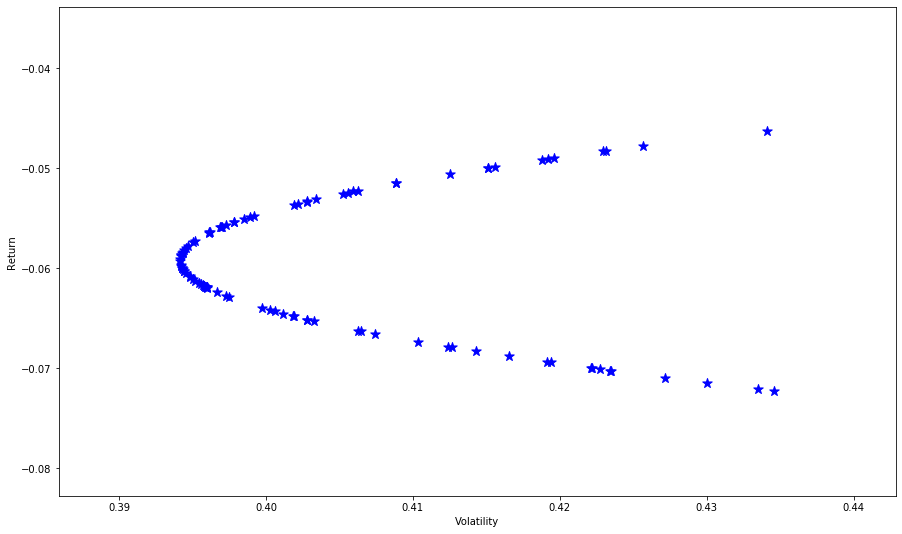

In [27]:
plot_volatility(retorno_volatividade)

---

---
## Análises de empresas de frigoríficos

#### O gráfico abaixo representa o valor das ações

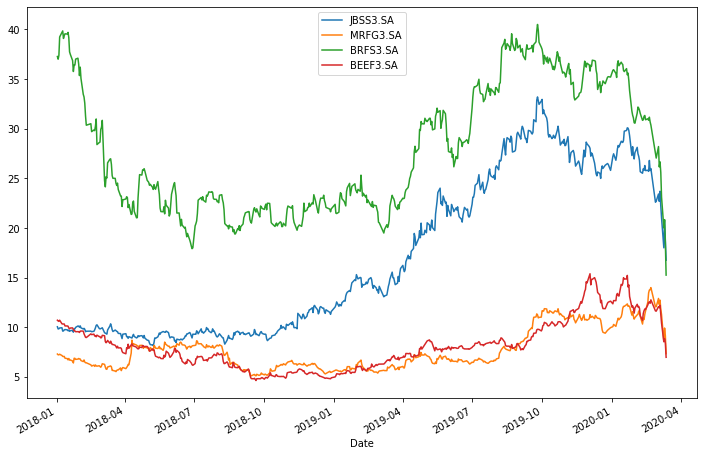

In [28]:
plot_graph(get_dataframe(frigorificos), (12,8))

#### O grágico abaixo representa o percentual de valorização das ações

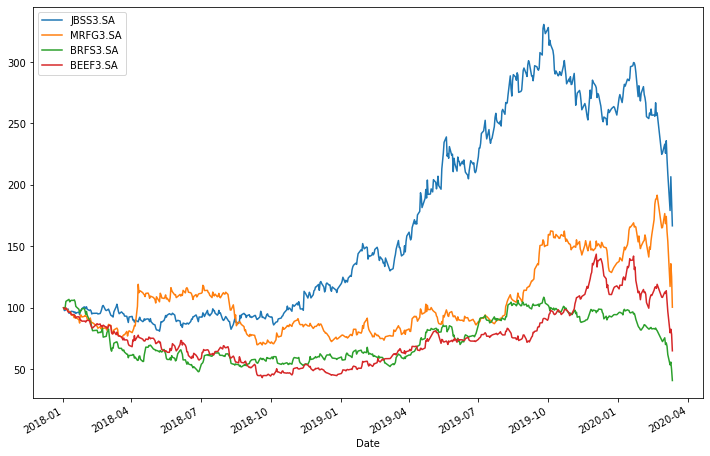

In [29]:
plot_graph(normalize(get_dataframe(frigorificos)), (12,8))

#### O gráfico abaixo representa a variação das ações em relação a média

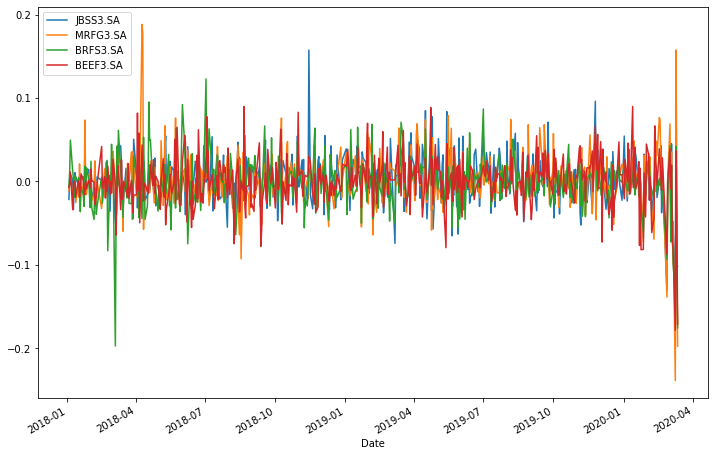

In [30]:
retorno_simples = simple_return(get_dataframe(frigorificos))
plot_graph(retorno_simples, (12,8))

#### A tabela abaixo representa a valorização das ações em % em aproximadamente 1 ano

In [31]:
s_percentual_return(frigorificos)

JBSS3.SA    34.185140
MRFG3.SA    13.966635
BRFS3.SA   -30.453353
BEEF3.SA    -9.307995
dtype: float64

#### A tabela abaixo representa os resultados com o maior retorno e menor volatividade em ordem cresente

In [32]:
retorno_logaritmo = log_return(get_dataframe(frigorificos))
retorno_volatividade = vol_return(retorno_logaritmo)
retorno_volatividade.sort_values(['Return', 'Volatility'], ascending=[True, False], inplace=True)
retorno_volatividade

Return  Volatility         0         1         2         3
40 -0.284444    0.384163  0.019682  0.049585  0.482424  0.448308
62 -0.278442    0.382441  0.069709  0.014552  0.523110  0.392630
4  -0.262470    0.380562  0.027468  0.103864  0.446994  0.421674
20 -0.260710    0.378751  0.074919  0.062901  0.496604  0.365576
77 -0.259308    0.399446  0.172592  0.039327  0.665939  0.122142
..       ...         ...       ...       ...       ...       ...
64  0.038903    0.384371  0.440892  0.269018  0.039807  0.250283
68  0.046666    0.379085  0.534483  0.121976  0.055671  0.287870
60  0.062829    0.403847  0.425337  0.424861  0.043147  0.106655
99  0.080720    0.399059  0.517429  0.337528  0.064871  0.080172
5   0.134419    0.417018  0.784773  0.077552  0.113704  0.023971

[100 rows x 6 columns]

#### O gráfico abaixo representa área de retorno e volatividade de acordo com a teoria de Markowitz

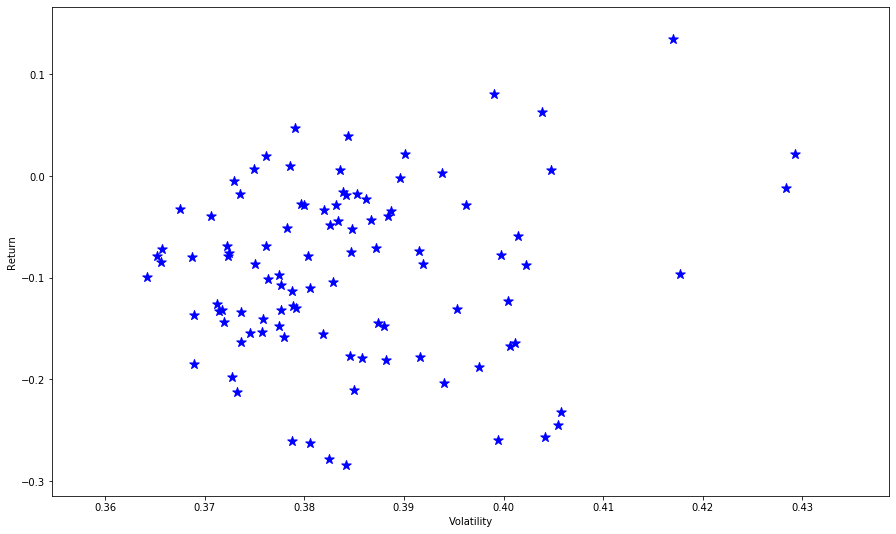

In [33]:
plot_volatility(retorno_volatividade)

---

---
## Análises de ações bancárias

### O gráfico abaixo representa o valor das ações

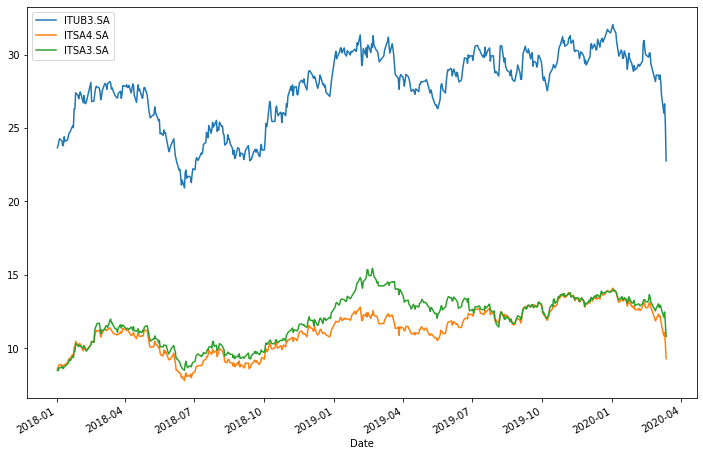

In [34]:
plot_graph(get_dataframe(bancos), (12,8))

### O grágico abaixo representa o percentual de valorização das ações

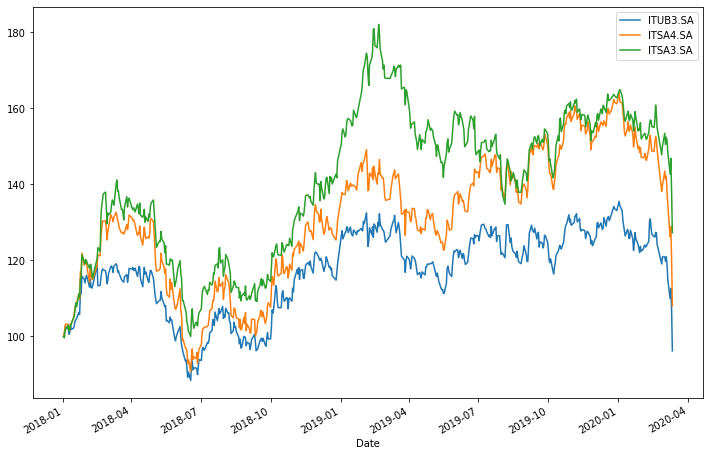

In [35]:
plot_graph(normalize(get_dataframe(bancos)), (12,8))

### O gráfico abaixo representa a variação das ações em relação a média

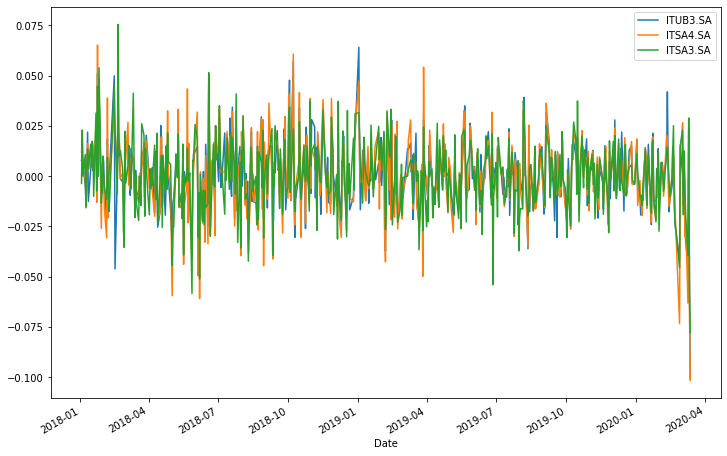

In [36]:
retorno_simples = simple_return(get_dataframe(bancos))
plot_graph(retorno_simples, (12,8))

### A tabela abaixo representa a valorização das ações em % em aproximadamente 1 ano

In [37]:
s_percentual_return(bancos)

ITUB3.SA     1.595617
ITSA4.SA     8.078840
ITSA3.SA    15.004719
dtype: float64

### A tabela abaixo representa os resultados com o maior retorno e menor volatividade em ordem cresente

In [38]:
retorno_logaritmo = log_return(get_dataframe(bancos))
retorno_volatividade = vol_return(retorno_logaritmo)
retorno_volatividade.sort_values(['Return', 'Volatility'], ascending=[True, False], inplace=True)
retorno_volatividade

Return  Volatility         0         1         2
2  -0.000105    0.263003  0.683775  0.306040  0.010185
89  0.005373    0.257442  0.695285  0.214153  0.090562
9   0.006657    0.263553  0.596195  0.366691  0.037114
73  0.007574    0.263906  0.581576  0.379612  0.038812
81  0.013206    0.253103  0.672135  0.150490  0.177376
..       ...         ...       ...       ...       ...
54  0.084227    0.262221  0.140377  0.123795  0.735829
60  0.087331    0.264718  0.096326  0.158221  0.745454
98  0.087763    0.266194  0.068088  0.200819  0.731093
44  0.094136    0.265151  0.131125  0.008997  0.859878
79  0.094676    0.269778  0.018649  0.194248  0.787104

[100 rows x 5 columns]

### O gráfico abaixo representa área de retorno e volatividade de acordo com a teoria de Markowitz

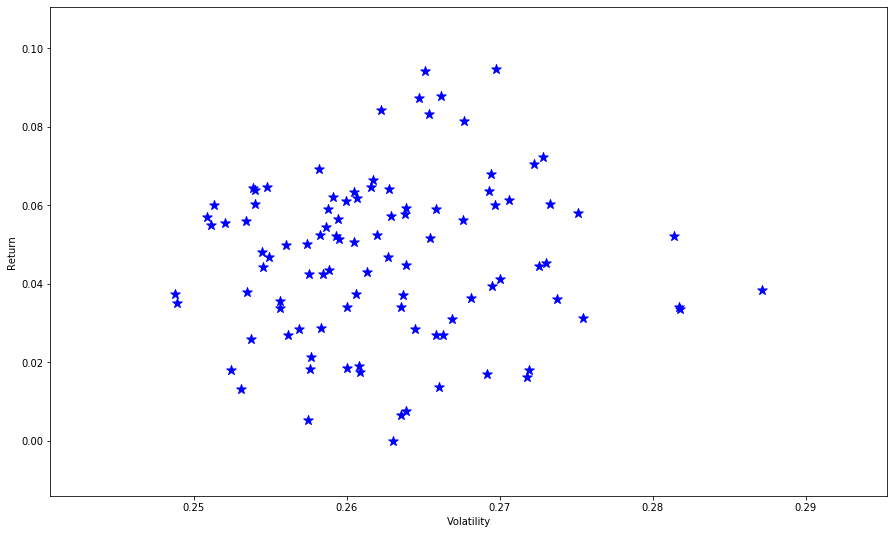

In [39]:
plot_volatility(retorno_volatividade)

---

---
## Análise de ações de vestuários

### O gráfico abaixo representa o valor das ações

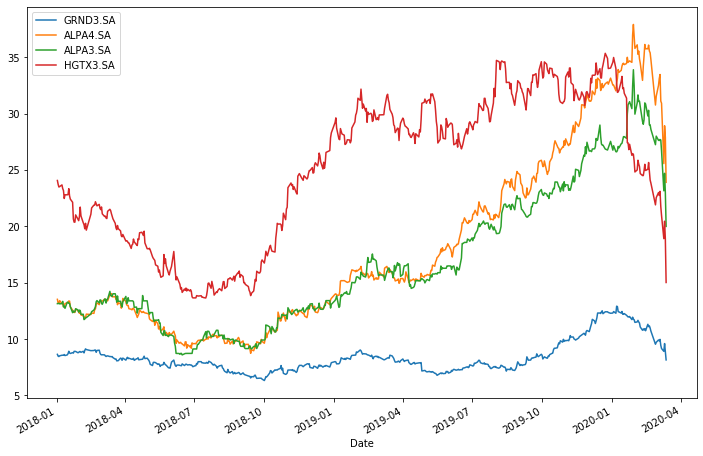

In [40]:
plot_graph(get_dataframe(vestuario), (12,8))

### O grágico abaixo representa o percentual de valorização das ações

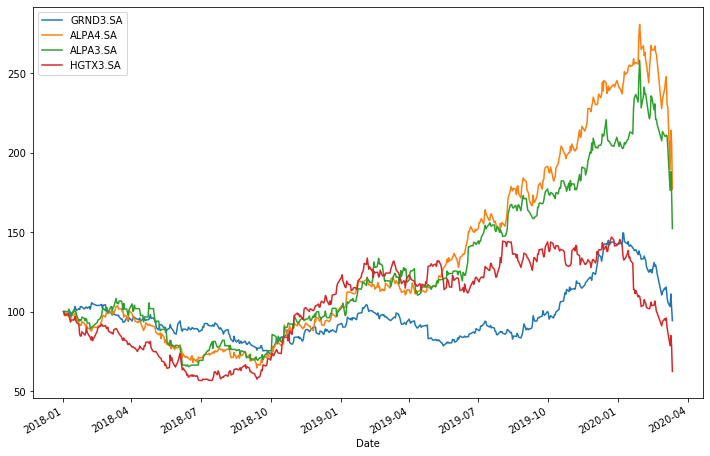

In [41]:
plot_graph(normalize(get_dataframe(vestuario)), (12,8))

### O gráfico abaixo representa a variação das ações em relação a média

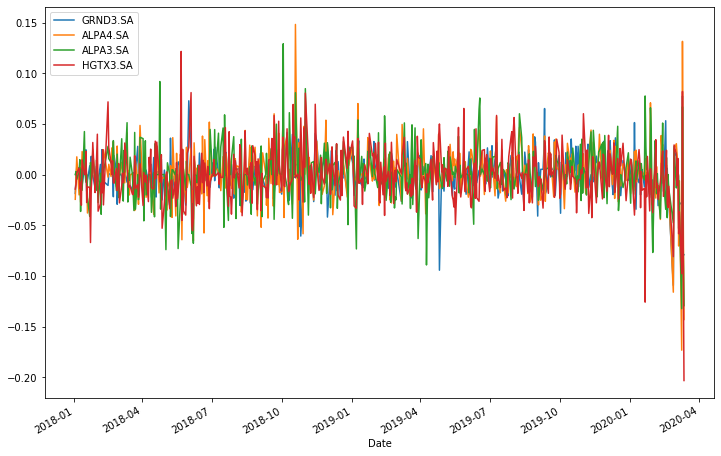

In [42]:
retorno_simples = simple_return(get_dataframe(vestuario))
plot_graph(retorno_simples, (12,8))

### A tabela abaixo representa a valorização das ações em % em aproximadamente 1 ano

In [43]:
s_percentual_return(vestuario)

GRND3.SA     1.623346
ALPA4.SA    34.249275
ALPA3.SA    27.794640
HGTX3.SA   -13.158376
dtype: float64

### A tabela abaixo representa os resultados com o maior retorno e menor volatividade em ordem cresente

In [44]:
retorno_logaritmo = log_return(get_dataframe(vestuario))
retorno_volatividade = vol_return(retorno_logaritmo)
retorno_volatividade.sort_values(['Return', 'Volatility'], ascending=[True, False], inplace=True)
retorno_volatividade

Return  Volatility         0         1         2         3
4  -0.077184    0.276280  0.520128  0.004771  0.096085  0.379015
42 -0.072156    0.321982  0.175766  0.175652  0.068118  0.580463
8  -0.061686    0.272994  0.536938  0.043504  0.080508  0.339050
26 -0.043524    0.273250  0.446107  0.090983  0.111014  0.351896
60 -0.036313    0.321015  0.069568  0.158620  0.223846  0.547966
..       ...         ...       ...       ...       ...       ...
66  0.161363    0.323325  0.228207  0.675992  0.023740  0.072061
72  0.163836    0.297372  0.187118  0.376982  0.398077  0.037824
5   0.170878    0.324033  0.131978  0.200801  0.646467  0.020755
48  0.173864    0.318259  0.237784  0.658586  0.069854  0.033776
33  0.185414    0.330657  0.007822  0.558916  0.320738  0.112524

[100 rows x 6 columns]

### O gráfico abaixo representa área de retorno e volatividade de acordo com a teoria de Markowitz

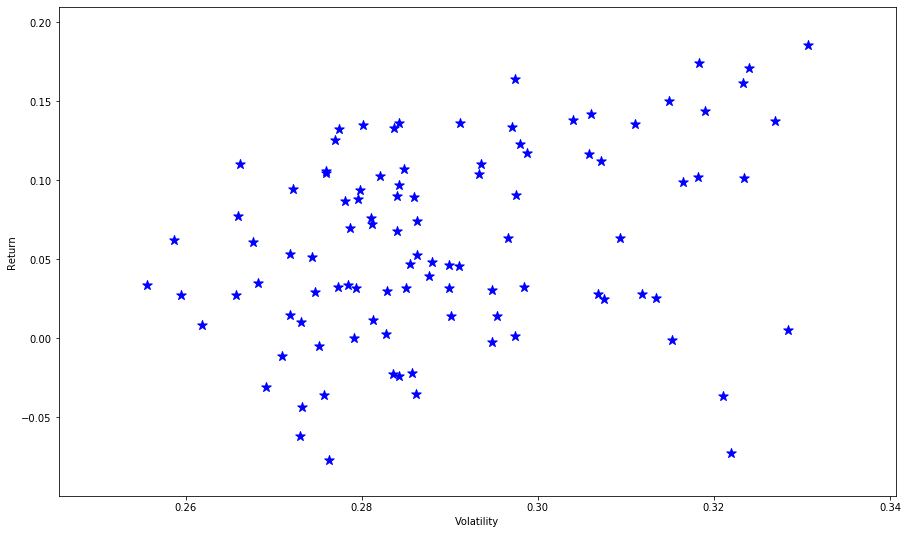

In [45]:
plot_volatility(retorno_volatividade)

---

---
## Análise de ações de serviços financeiros

### O gráfico abaixo representa o valor das ações

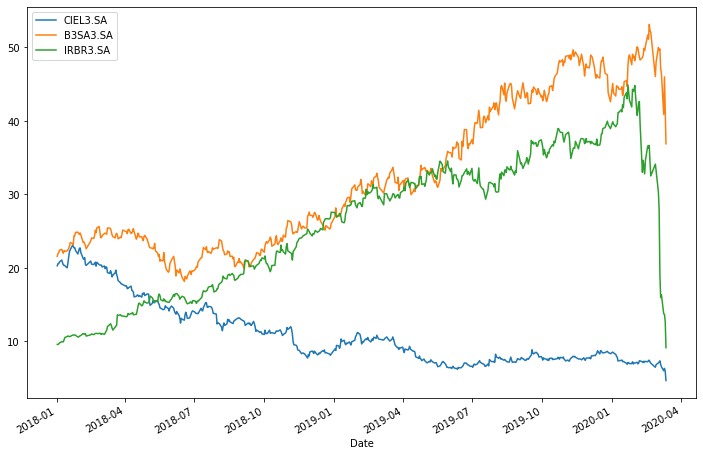

In [46]:
plot_graph(get_dataframe(servicos_financeiros), (12,8))

### O grágico abaixo representa o percentual de valorização das ações

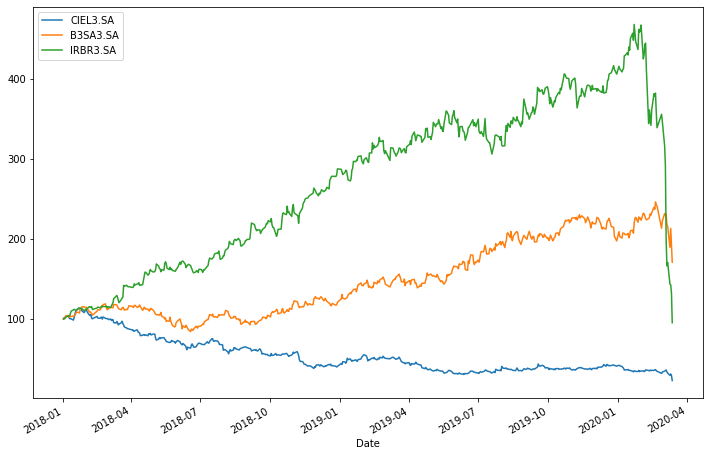

In [47]:
plot_graph(normalize(get_dataframe(servicos_financeiros)), (12,8))

### O gráfico abaixo representa a variação das ações em relação a média

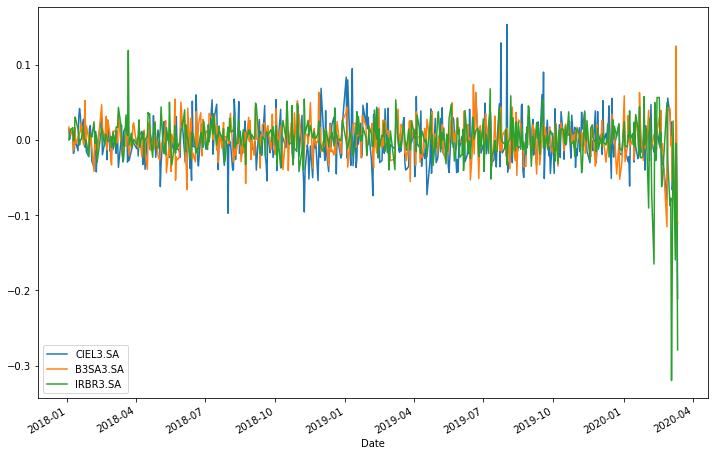

In [48]:
retorno_simples = simple_return(get_dataframe(servicos_financeiros))
plot_graph(retorno_simples, (12,8))

### A tabela abaixo representa a valorização das ações em % em aproximadamente 1 ano

In [49]:
s_percentual_return(servicos_financeiros)

CIEL3.SA   -56.315521
B3SA3.SA    32.254586
IRBR3.SA    10.953382
dtype: float64

### A tabela abaixo representa os resultados com o maior retorno e menor volatividade em ordem cresente

In [50]:
retorno_logaritmo = log_return(get_dataframe(servicos_financeiros))
retorno_volatividade = vol_return(retorno_logaritmo)
retorno_volatividade.sort_values(['Return', 'Volatility'], ascending=[True, False], inplace=True)
retorno_volatividade

Return  Volatility         0         1         2
7  -0.621420    0.455430  0.923106  0.028425  0.048469
18 -0.606004    0.443554  0.889888  0.004713  0.105399
17 -0.557704    0.425334  0.831167  0.040540  0.128294
8  -0.555964    0.426319  0.834228  0.054401  0.111370
67 -0.435726    0.387772  0.695837  0.162511  0.141652
..       ...         ...       ...       ...       ...
39  0.092712    0.350518  0.150575  0.790518  0.058907
33  0.116064    0.342556  0.051439  0.636064  0.312496
53  0.119775    0.346320  0.036037  0.612375  0.351588
66  0.127705    0.341841  0.055322  0.688492  0.256186
74  0.156776    0.364929  0.092027  0.884998  0.022976

[100 rows x 5 columns]

### O gráfico abaixo representa área de retorno e volatividade de acordo com a teoria de Markowitz

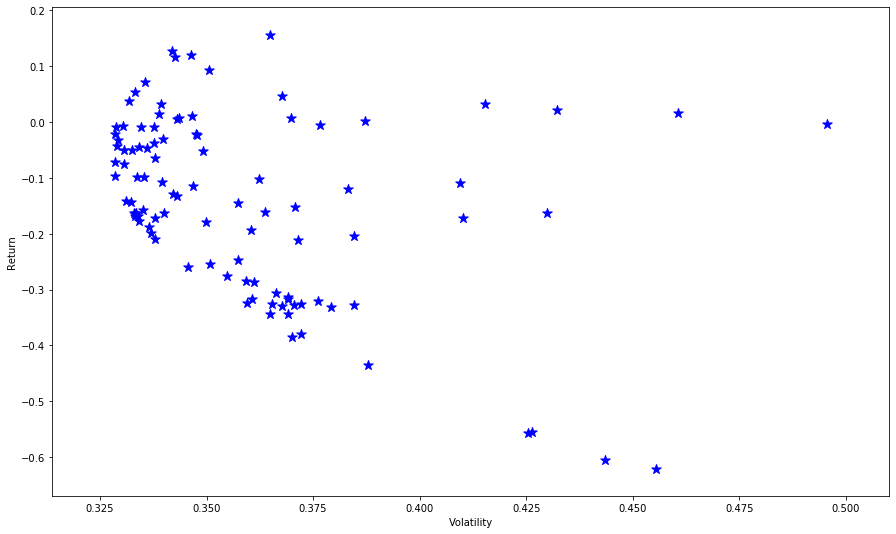

In [51]:
plot_volatility(retorno_volatividade)

---

---
## Análise de ações de farmácos

### O gráfico abaixo representa o valor das ações

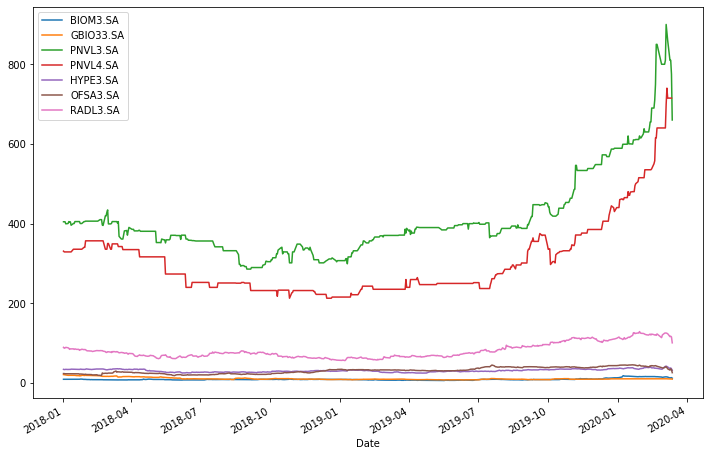

In [52]:
plot_graph(get_dataframe(farma), (12,8))

### O grágico abaixo representa o percentual de valorização das ações

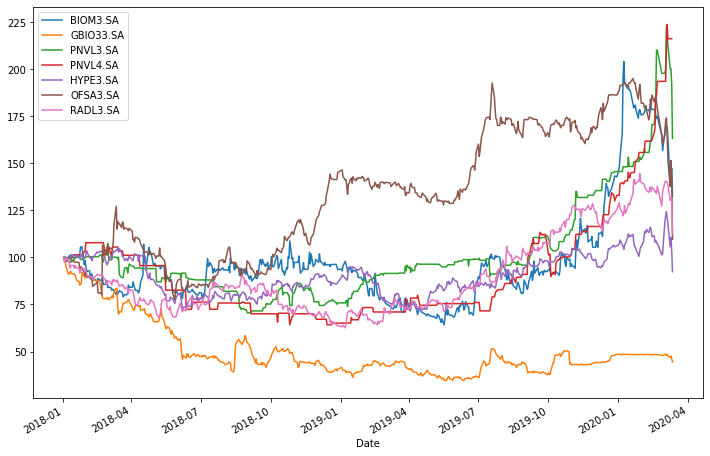

In [53]:
plot_graph(normalize(get_dataframe(farma)), (12,8))

### O gráfico abaixo representa a variação das ações em relação a média

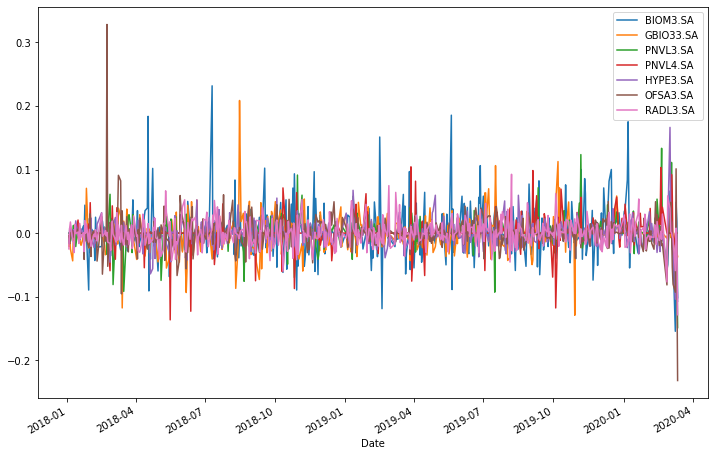

In [54]:
retorno_simples = simple_return(get_dataframe(farma))
plot_graph(retorno_simples, (12,8))

### A tabela abaixo representa a valorização das ações em % em aproximadamente 1 ano

In [55]:
s_percentual_return(farma)

BIOM3.SA     29.088371
GBIO33.SA   -29.544035
PNVL3.SA     27.651918
PNVL4.SA     41.046572
HYPE3.SA      1.361902
OFSA3.SA     13.319992
RADL3.SA     10.989018
dtype: float64

### A tabela abaixo representa os resultados com o maior retorno e menor volatividade em ordem cresente

In [56]:
retorno_logaritmo = log_return(get_dataframe(farma))
retorno_volatividade = vol_return(retorno_logaritmo)
retorno_volatividade.sort_values(['Return', 'Volatility'], ascending=[True, False], inplace=True)
retorno_volatividade

Return  Volatility         0         1         2         3         4  \
86 -0.121353    0.226444  0.009144  0.394256  0.013088  0.075036  0.345931   
8  -0.063027    0.216158  0.114146  0.247492  0.029036  0.008601  0.288416   
83 -0.059406    0.205303  0.102371  0.348729  0.136735  0.071280  0.173927   
32 -0.035639    0.223493  0.151150  0.225671  0.090862  0.005523  0.209418   
20 -0.022023    0.216280  0.029054  0.209628  0.185437  0.021019  0.262115   
..       ...         ...       ...       ...       ...       ...       ...   
1   0.126021    0.230513  0.283549  0.077503  0.281424  0.123897  0.011758   
77  0.169255    0.272132  0.402470  0.000778  0.075552  0.245162  0.010196   
76  0.176961    0.198976  0.136522  0.000724  0.241967  0.241900  0.011778   
17  0.198330    0.194982  0.134176  0.031570  0.308045  0.312347  0.010188   
73  0.210929    0.203311  0.132850  0.016805  0.347009  0.330458  0.061587   

           5         6  
86  0.042763  0.119782  
8   0.104383  0.207926  
83  0.090771  0.076187  
32  0.240170  0.077206  
20  0.258522  0.034225  
..       ...       ...  
1   0.161481  0.060388  
77  0.185678  0.080162  
76  0.173520  0.193589  
17  0.016613  0.187061  
73  0.102000  0.009290  

[100 rows x 9 columns]

### O gráfico abaixo representa área de retorno e volatividade de acordo com a teoria de Markowitz

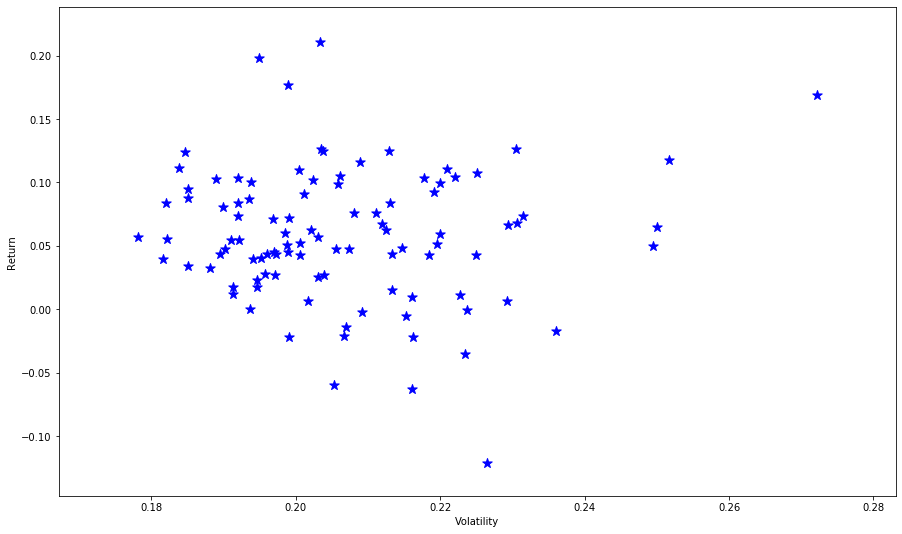

In [57]:
plot_volatility(retorno_volatividade)

---

---

## Foi escolhida uma ação de cada setor analisado para formar uma carteira de investimento. Essa carteira tem o objetivo de minimizar os riscos e maximizar os lucros de acordo com a teoria de markowitz.

### Linhas aéreas: GOLL4.SA
### Petróleo: PETR4.SA
### Mineração: GGBR4.SA
### Frigorífico: JBSS3.SA

---
## Análise da carteira de investimento diversificada

- GOLL4.SA
- PETR4.SA
- GGBR4.SA
- JBSS3.SA

#### A tabela abaixo representa o valor de fechamento das ações de 2018 até 2020/03/10

In [58]:
get_dataframe(acoes)

GOLL4.SA   PETR4.SA   GGBR4.SA   JBSS3.SA   WEGE3.SA
Date                                                             
2018-01-02  15.190000  15.354614  12.392261  10.044865  18.689281
2018-01-03  15.010000  15.493781  12.373149   9.826065  18.405342
2018-01-04  15.580000  15.521611  13.041969   9.845956  18.226078
2018-01-05  15.660000  15.614388  12.879541   9.925519  18.300858
2018-01-08  15.700000  15.799945  13.328607   9.945410  18.450205
...               ...        ...        ...        ...        ...
2020-03-06  21.049999  22.830000  16.150000  21.010000  44.020000
2020-03-09  17.379999  16.049999  13.250000  18.000000  39.750000
2020-03-10  18.320000  17.559999  14.340000  20.760000  41.910000
2020-03-11  15.650000  15.700000  12.690000  18.650000  39.200001
2020-03-12   9.970000  12.600000  10.600000  16.750000  33.000000

[540 rows x 5 columns]

#### O gráfico abaixo representa o valor das ações

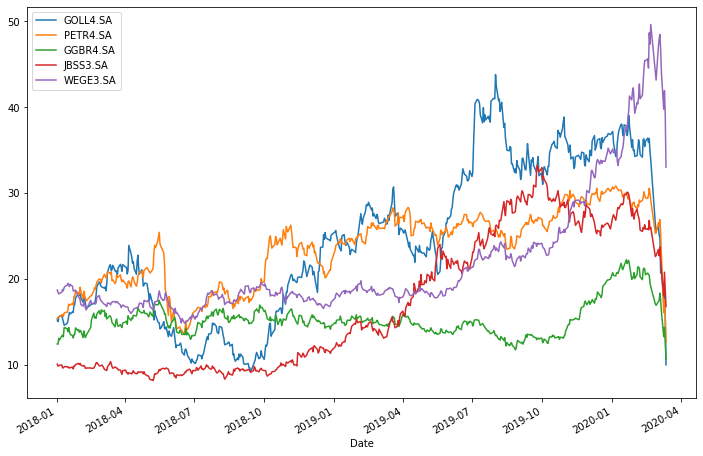

In [59]:
plot_graph(get_dataframe(acoes), (12,8))

#### O grágico abaixo representa o percentual de valorização das ações

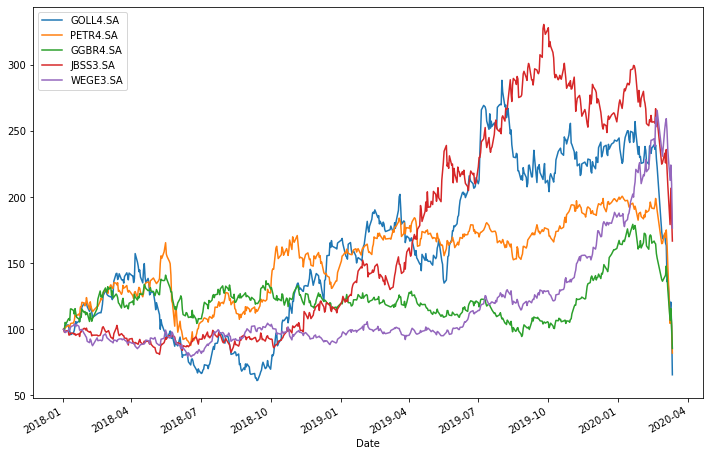

In [60]:
plot_graph(normalize(get_dataframe(acoes)), (12,8))

#### O gráfico abaixo representa a variação das ações em relação a média

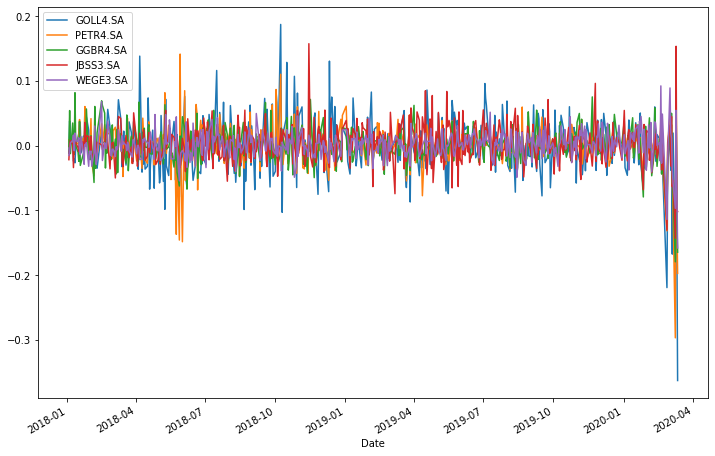

In [61]:
retorno_simples = simple_return(get_dataframe(acoes))
plot_graph(retorno_simples, (12,8))

#### A tabela abaixo representa a valorização das ações em % em aproximadamente 1 ano

In [62]:
s_percentual_return(acoes)

GOLL4.SA     3.668672
PETR4.SA     4.170340
GGBR4.SA     2.132070
JBSS3.SA    34.185140
WEGE3.SA    32.141883
dtype: float64

#### A tabela abaixo representa os resultados com o maior retorno e menor volatividade em ordem cresente

In [63]:
retorno_logaritmo = log_return(get_dataframe(acoes))
retorno_volatividade = vol_return(retorno_logaritmo)
retorno_volatividade.sort_values(['Return', 'Volatility'], ascending=[True, False], inplace=True)
retorno_volatividade

Return  Volatility         0         1         2         3         4
97 -0.115309    0.484795  0.453781  0.279633  0.210430  0.022783  0.033373
17 -0.076429    0.443912  0.322822  0.334908  0.208780  0.103429  0.030060
21 -0.071856    0.515203  0.615131  0.098747  0.041535  0.156702  0.087886
46 -0.069682    0.431556  0.032279  0.561851  0.351103  0.032245  0.022522
57 -0.061472    0.426872  0.312825  0.248955  0.269160  0.099036  0.070025
..       ...         ...       ...       ...       ...       ...       ...
39  0.124123    0.333960  0.075615  0.145663  0.132559  0.321988  0.324174
6   0.140898    0.329635  0.126406  0.074764  0.100977  0.161000  0.536853
18  0.143732    0.337125  0.092957  0.085668  0.108629  0.389773  0.322973
44  0.160886    0.318414  0.019479  0.093376  0.155948  0.311603  0.419594
31  0.163698    0.320360  0.004281  0.151000  0.108162  0.302117  0.434439

[100 rows x 7 columns]

#### O gráfico abaixo representa área de retorno e volatividade de acordo com a teoria de Markowitz

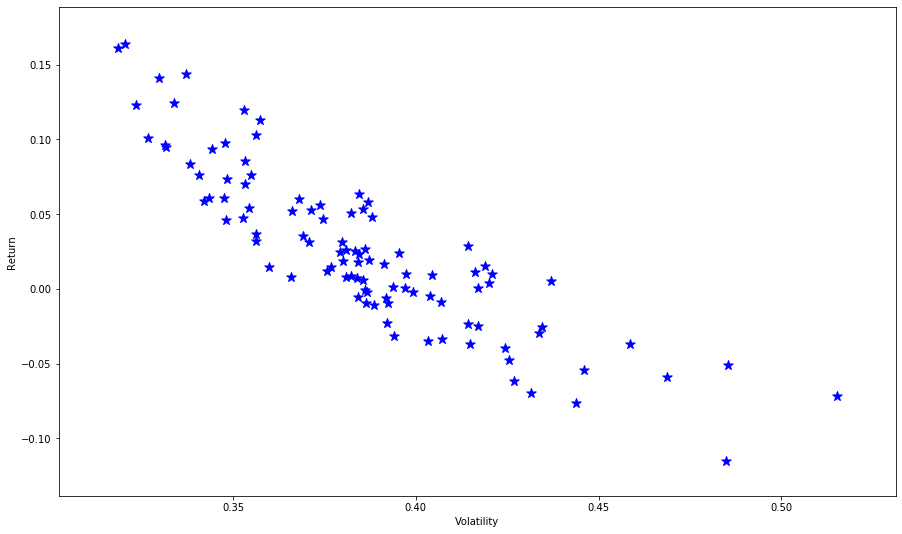

In [64]:
plot_volatility(retorno_volatividade)

--- 

# Análise de todas as ações

### O gráfico abaixo representa o valor das ações

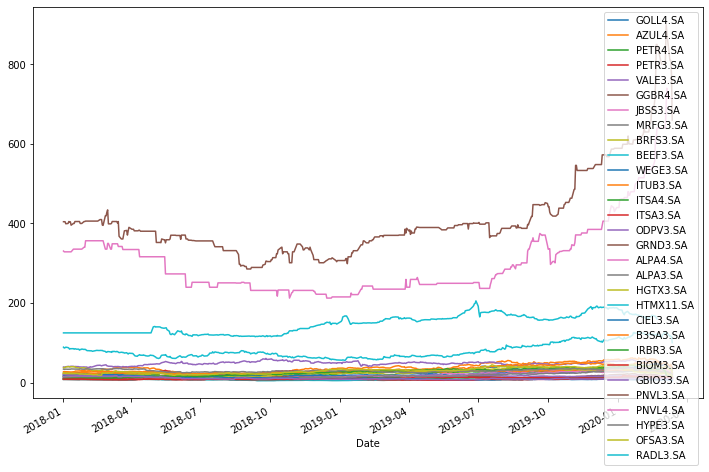

In [65]:
plot_graph(get_dataframe(todas), (12,8))

### O grágico abaixo representa o percentual de valorização das ações

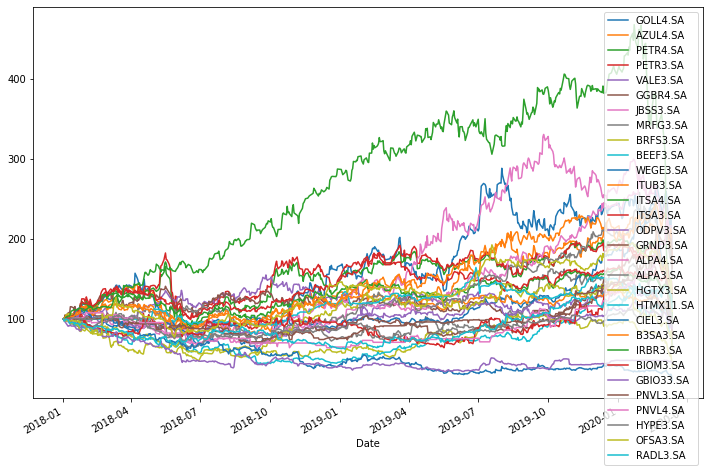

In [66]:
plot_graph(normalize(get_dataframe(todas)), (12,8))

### O gráfico abaixo representa a variação das ações em relação a média

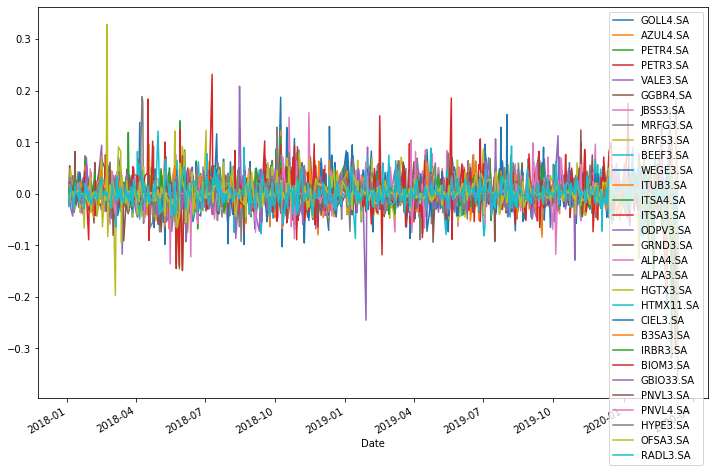

In [67]:
retorno_simples = simple_return(get_dataframe(todas))
plot_graph(retorno_simples, (12,8))

### A tabela abaixo representa a valorização das ações em % em aproximadamente 1 ano

In [68]:
s_percentual_return(todas)

GOLL4.SA      3.668672
AZUL4.SA      1.024326
PETR4.SA      4.170340
PETR3.SA      0.358795
VALE3.SA      4.595354
GGBR4.SA      2.132070
JBSS3.SA     34.185140
MRFG3.SA     13.966635
BRFS3.SA    -30.453353
BEEF3.SA     -9.307995
WEGE3.SA     32.141883
ITUB3.SA      1.595617
ITSA4.SA      8.078840
ITSA3.SA     15.004719
ODPV3.SA     -1.050439
GRND3.SA      1.623346
ALPA4.SA     34.249275
ALPA3.SA     27.794640
HGTX3.SA    -13.158376
HTMX11.SA    14.099435
CIEL3.SA    -56.315521
B3SA3.SA     32.254586
IRBR3.SA     10.953382
BIOM3.SA     29.088371
GBIO33.SA   -29.544035
PNVL3.SA     27.651918
PNVL4.SA     41.046572
HYPE3.SA      1.361902
OFSA3.SA     13.319992
RADL3.SA     10.989018
dtype: float64

### A tabela abaixo representa os resultados com o maior retorno e menor volatividade em ordem cresente

In [69]:
retorno_logaritmo = log_return(get_dataframe(todas))
retorno_volatividade = vol_return(retorno_logaritmo)
retorno_volatividade.sort_values(['Return', 'Volatility'], ascending=[True, False], inplace=True)
retorno_volatividade

Return  Volatility         0         1         2         3         4  \
44 -0.064612    0.255880  0.016604  0.020524  0.067225  0.065106  0.071655   
98 -0.063851    0.275070  0.057498  0.043767  0.053626  0.024442  0.045895   
26 -0.052789    0.240300  0.042464  0.032885  0.003637  0.008214  0.052452   
85 -0.051118    0.256180  0.050880  0.001856  0.024752  0.073889  0.031580   
35 -0.046878    0.257223  0.043270  0.060603  0.039179  0.046428  0.017468   
..       ...         ...       ...       ...       ...       ...       ...   
12  0.019791    0.237598  0.047933  0.035381  0.036509  0.054164  0.018617   
96  0.022304    0.252551  0.055146  0.035412  0.046079  0.029215  0.037178   
80  0.039357    0.220835  0.005400  0.008494  0.037461  0.033365  0.056536   
18  0.044570    0.242035  0.009618  0.034987  0.035944  0.055386  0.019467   
40  0.045428    0.228126  0.038964  0.038195  0.031247  0.020593  0.017130   

           5         6         7  ...        20        21        22        23  \
44  0.021766  0.058978  0.052806  ...  0.068764  0.012410  0.034181  0.016303   
98  0.054433  0.008295  0.063895  ...  0.059370  0.014023  0.024778  0.035322   
26  0.029908  0.032160  0.034446  ...  0.055940  0.027515  0.037530  0.010723   
85  0.067171  0.052641  0.006108  ...  0.074438  0.045472  0.002241  0.053826   
35  0.037722  0.010200  0.019764  ...  0.042991  0.044547  0.016601  0.013056   
..       ...       ...       ...  ...       ...       ...       ...       ...   
12  0.041981  0.059914  0.019267  ...  0.002047  0.015360  0.043289  0.022999   
96  0.018200  0.032490  0.049462  ...  0.005126  0.049465  0.056377  0.026097   
80  0.020296  0.039247  0.054300  ...  0.007263  0.016878  0.029369  0.006647   
18  0.057366  0.017121  0.031499  ...  0.010363  0.057169  0.053387  0.000989   
40  0.004799  0.036292  0.022821  ...  0.002143  0.007515  0.005222  0.085847   

          24        25        26        27        28        29  
44  0.018565  0.019134  0.045171  0.006507  0.039701  0.030070  
98  0.029441  0.002219  0.014448  0.003801  0.037952  0.009140  
26  0.057185  0.032461  0.001012  0.040146  0.058107  0.016568  
85  0.011821  0.001720  0.002218  0.019043  0.004591  0.047831  
35  0.000117  0.006669  0.022816  0.059644  0.012218  0.028894  
..       ...       ...       ...       ...       ...       ...  
12  0.022562  0.021338  0.061131  0.002385  0.010008  0.008797  
96  0.022829  0.024646  0.013483  0.020293  0.045803  0.049157  
80  0.024585  0.062968  0.061958  0.027412  0.030878  0.040742  
18  0.004905  0.052363  0.051749  0.001740  0.058301  0.049146  
40  0.048352  0.051842  0.048648  0.002575  0.079227  0.013866  

[100 rows x 32 columns]

### O gráfico abaixo representa área de retorno e volatividade de acordo com a teoria de Markowitz

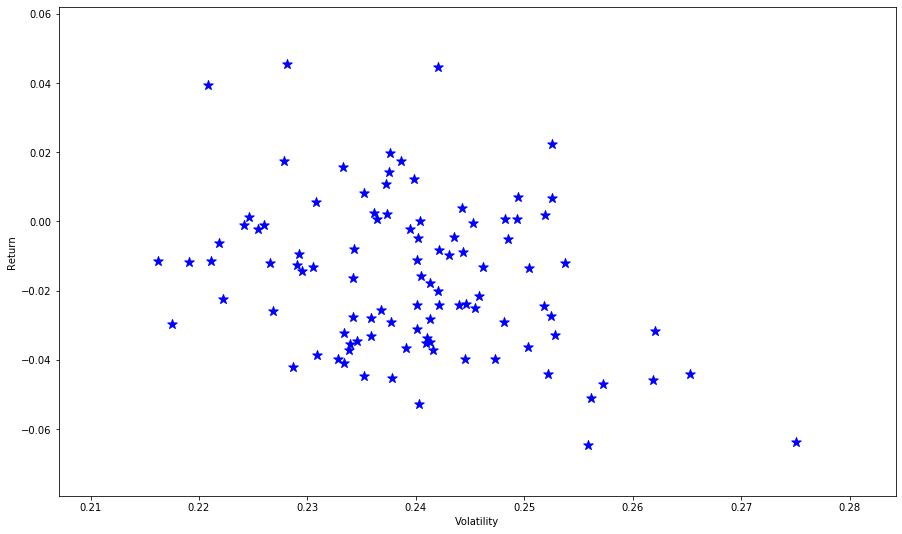

1433.5176227092743


In [70]:
plot_volatility(retorno_volatividade)
fim = time.time()
print(fim - inicio)

In [82]:
retorno_volatividade.to_csv('~/Python/relatorio.csv')